<a href="https://colab.research.google.com/github/Savepeter2/DSNOAU_AI/blob/master/Implementing_Keras_Tensorflow_For_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import keras


In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.layers import ReLU, LeakyReLU, PReLU, ELU

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split1

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded["Churn_Modelling.csv"]))

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#So let's change the categorical columns into binary classification

In [ ]:
geography = pd.get_dummies(dataset['Geography'], drop_first = True)

In [ ]:
gender = pd.get_dummies(dataset['Gender'], drop_first = True)

In [ ]:
dataset.drop(['RowNumber', 'Surname', 'Geography', 'Gender'], axis = 1, inplace = True)

In [ ]:
dataset = pd.concat([dataset, geography, gender], axis = 1)

In [ ]:
dataset

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = dataset.drop(['Exited', 'CustomerId'], axis = 1)


In [ ]:
Y = dataset['Exited']

In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X , Y, test_size = 0.2, random_state = 1)

In [ ]:
#Now let's scale our data , scaling in deep learning is important because of our features might not be in the same range as the weights)(so we have to
#to scale it, so they can be inline, and the summaton will go faster which will yield the updation of the weights in the back propagation process)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
#Now let's make the ANN

In [ ]:
classifier = Sequential()

In [ ]:
#Adding the first input layer and the hidden layer
classifier.add(Dense(units = 10, activation = 'relu', kernel_initializer= 'he_uniform', input_dim = 11))

In [ ]:
#adding the second layer

In [ ]:
classifier.add(Dense(units = 20, activation = 'relu', kernel_initializer= 'he_uniform'))

In [ ]:
#adding the output layer

In [ ]:
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform'))

In [ ]:
#Compiling the ANN

In [ ]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Adamax is currently the best and the most popular optimizer used in neural networks

In [ ]:
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size= 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8574 - val_loss: 0.3461 - val_accuracy: 0.8584
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3418 - accuracy: 0.8666 - val_loss: 0.3446 - val_accuracy: 0.8591
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3399 - accuracy: 0.8645 - val_loss: 0.3475 - val_accuracy: 0.8565
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8688 - val_loss: 0.3541 - val_accuracy: 0.8531
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3391 - accuracy: 0.8668 - val_loss: 0.3487 - val_accuracy: 0.8554
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8664 - val_loss: 0.3457 - val_accuracy: 0.8573
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8675 - val_loss: 0.3427 - val_accuracy: 0.8595

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#Summarize the history for accuracy|

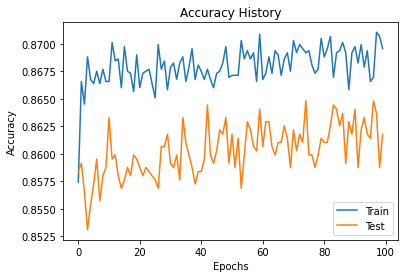

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy History')
plt.legend(['Train', 'Test'], loc = 'best')
plt.show()


In [ ]:
#Let's visualize the history for the loss 

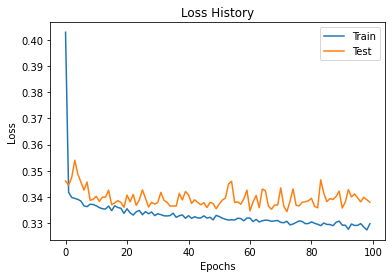

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend(['Train', 'Test'], loc = 'best')
plt.show()


In [ ]:
#So let's test the accuracy score based on pred

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = y_pred > 0.5

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(Y_test, y_pred)

In [ ]:
score

0.8635

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])